<a href="https://colab.research.google.com/github/Juampo933/Juampo933/blob/main/An%C3%A1lisis_de_Gr%C3%A1ficos_en_Python_Visualizaciones_Emisiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis de Emisiones:**

🧑 *Este notebook cuenta con la intencion de servir como introducción en el análisis de datos con python.* 🧑

🌊 *Se utilizarán distintas librerias, tales como matplotlib  y seaborn.* 🌊


 🏎 🚙 *Espero les sea de gran utilidad e interés!*  🏎 🚙

🙂🙂 ***Empecemos:*** 🙂🙂

# **Archivo:**
http://datos.ambiente.gob.ar/dataset/501cb1f2-781d-44d0-9f91-4984587bbe35/resource/fc0039f7-bb75-4960-9a33-3a51955c8e9f/download/tabla_iva.csv

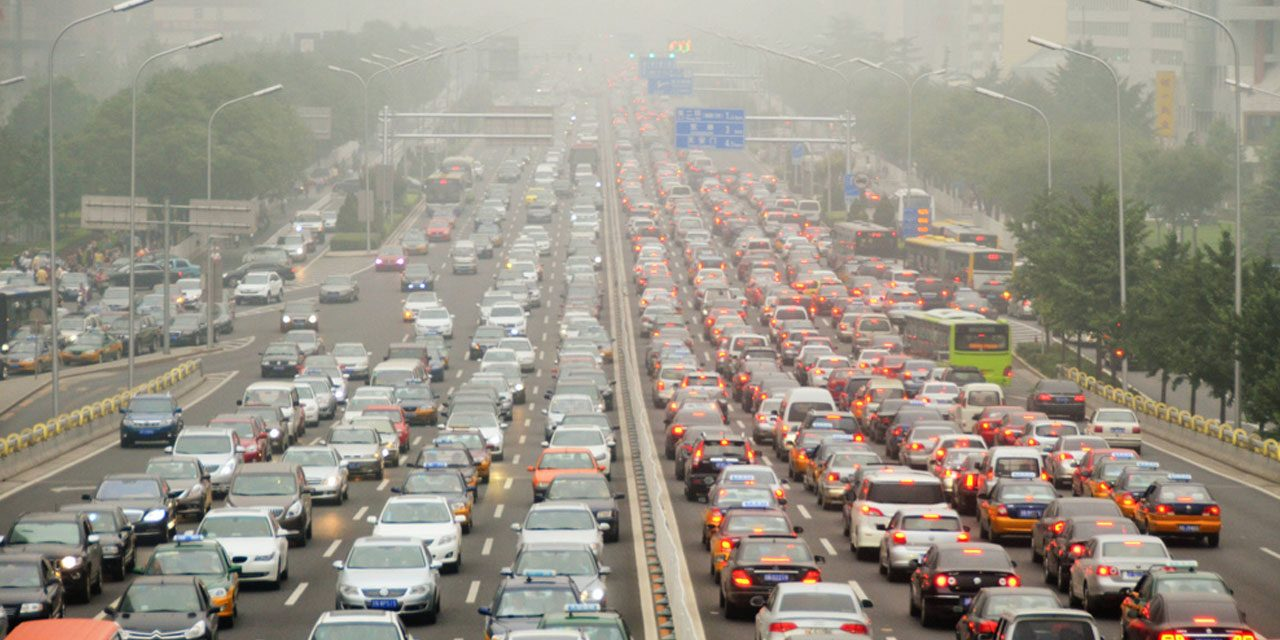

# **Importamos las librerías!**

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('bmh')

In [2]:
import plotly.express as px  
import plotly.graph_objects as go
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

*Nota:*

*En esta ocasión, usé seaborn (por lo que verán que utilizaremos sns en varios graficos)*



Importamos el dataset (el mismo esta guardado en una de mis carpetas de mi Google Drive)

In [3]:
from google.colab import drive
drive.mount('/content/drive')
df_emisiones=pd.read_excel('/content/drive/MyDrive/Archivos/tabla_iva.xlsx')

Mounted at /content/drive


# **Primer contacto:**

Visualizamos unas filas del Dataset y podemos ver que se trata de un Registro de autos con varias características diferentes.

In [4]:
df_emisiones.head(7)

,vehiculo_marca,vehiculo_modelo,vehiculo_tipo,vehiculo_traccion,vehiculo_id_motor,vehiculo_cilindrada,vehiculo_potencia,vehiculo_tipo_transmision,vehiculo_tipo_combustible,vehiculo_standard_emision,lca_numero,fecha_firma,ensayo_gei_numero,ensayo_gei_laboratorio,emision_CO2,consumo_urbano,consumo_extraurbano,consumo_mixto,id_etiqueta
0,TOYOTA,LAND CRUISER 200,SUV,4x4,TOYOTA 1VD-FTV,4461.0,NaN,AUTOMÁTICA,GAS OIL,EURO V,NaN,2017-10-04,H1860666086/241,VINÇOTTE nv,260.7,11.56,8.94,9.90,9.90
1,RENAULT,FLUENCE 2.0 16V,SEDÁN 4 PUERTAS,4x2,RENAULT M4RK7,1997.0,NaN,CVT,NAFTA,EURO V,NaN,2016-06-22,09/09790,UTAC,175.4,10.50,6.10,7.70,7.70
2,RENAULT,DUSTER 2.0 16v,SEDÁN 5 PUERTAS,4x2,RENAULT F4R E4,1998.0,105,MANUAL,NAFTA,EURO V,NaN,NaT,R1-0210/17,DELPHI,198.86,11.13,6.98,8.52,8.52
3,RENAULT,DUSTER 2.0 16v 4X4,SEDÁN 5 PUERTAS,4X4,RENAULT F4R E4,1998.0,105,MANUAL,NAFTA,EURO V,NaN,NaT,R1-0209/17,DELPHI,199.74,11.20,7.01,8.55,8.55
4,CITROËN,DS4,COUPÉ 3 + 2 PUERTAS,4x2,CITROËN EP6CDTM (5FM),1598.0,NaN,AUTOMÁTICA,NAFTA,EURO V,NaN,2011-10-11,11/04511,UTAC,177.6,10.60,6.00,7.70,7.70
5,RENAULT,MASTER dCi,FURGÓN / CHASIS CON CABINA,4x2,RENAULT M9T B8,2299.0,92,MANUAL,GAS OIL,EURO V,NaN,2017-07-12,PV 13/06222,UTAC,214.8,9.20,7.40,8.00,8.00
6,CITROËN,DS3,BERLINA 3 PUERTAS,4x2,CITROËN EP6CDT (5FV),1598.0,NaN,MANUAL,NAFTA,EURO V,NaN,2011-12-21,11/02413,UTAC,140.8,8.20,4.70,6.00,6.00


In [5]:
print(df_emisiones.size)
print(df_emisiones.shape)

11533
(607, 19)


In [6]:
df_emisiones.columns

Index(['vehiculo_marca', 'vehiculo_modelo', 'vehiculo_tipo',
       'vehiculo_traccion', 'vehiculo_id_motor', 'vehiculo_cilindrada',
       'vehiculo_potencia', 'vehiculo_tipo_transmision',
       'vehiculo_tipo_combustible', 'vehiculo_standard_emision', 'lca_numero',
       'fecha_firma', 'ensayo_gei_numero', 'ensayo_gei_laboratorio',
       'emision_CO2', 'consumo_urbano', 'consumo_extraurbano', 'consumo_mixto',
       'id_etiqueta'],
      dtype='object')

In [7]:
df_emisiones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   vehiculo_marca             607 non-null    object        
 1   vehiculo_modelo            607 non-null    object        
 2   vehiculo_tipo              607 non-null    object        
 3   vehiculo_traccion          607 non-null    object        
 4   vehiculo_id_motor          607 non-null    object        
 5   vehiculo_cilindrada        606 non-null    float64       
 6   vehiculo_potencia          317 non-null    object        
 7   vehiculo_tipo_transmision  606 non-null    object        
 8   vehiculo_tipo_combustible  606 non-null    object        
 9   vehiculo_standard_emision  604 non-null    object        
 10  lca_numero                 463 non-null    float64       
 11  fecha_firma                587 non-null    datetime64[ns]
 12  ensayo_g

Podemos ver ciertas cositas que no nos gustan, como que la variable "emision_CO2    " es object. 

Para poder trabajarla debemos pasarla a int o float (variable cuantitativa continua)

**!**

Podemos crear otro dataframe, idéntico al original, para evitar usar y sobreescribir este último

In [8]:
df_emisiones2 = df_emisiones

Lamentablemente, tenemos otra dificultad, si vemos el archivo en Excel, podemos visualizar que hay un valor fuera de rango (´173.77) que no nos permite trabajar correctamente con la funcion "astype" para modificar el tipo de datos de esta columna

In [9]:
#df_emisiones2 = df_emisiones2.astype({'emision_CO2':float})

Como ven arriba, nos tira error.

Pero como es un único error, podemos reemplazarlo con el valor correcto y así cambiar el tipo de datos de la columna "emision_CO2".

In [10]:
df_emisiones2.emision_CO2 = df_emisiones2.emision_CO2.replace({'`173.77':173.77})

In [11]:
df_emisiones2 = df_emisiones2.astype({'emision_CO2':float})

Como veremos en el sgte "info", **'emision_CO2'** es ahora **float**:

In [12]:
df_emisiones2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   vehiculo_marca             607 non-null    object        
 1   vehiculo_modelo            607 non-null    object        
 2   vehiculo_tipo              607 non-null    object        
 3   vehiculo_traccion          607 non-null    object        
 4   vehiculo_id_motor          607 non-null    object        
 5   vehiculo_cilindrada        606 non-null    float64       
 6   vehiculo_potencia          317 non-null    object        
 7   vehiculo_tipo_transmision  606 non-null    object        
 8   vehiculo_tipo_combustible  606 non-null    object        
 9   vehiculo_standard_emision  604 non-null    object        
 10  lca_numero                 463 non-null    float64       
 11  fecha_firma                587 non-null    datetime64[ns]
 12  ensayo_g

In [13]:
df_emisiones2.describe().T

,count,mean,std,min,25%,50%,75%,max
vehiculo_cilindrada,606.0,2111.648515,871.700887,997.00,1515.50,1981.0,2359.0,6496.0
lca_numero,463.0,396.345572,266.958850,2.00,162.50,340.0,573.0,915.0
emision_CO2,607.0,183.538303,43.958914,13.40,153.60,176.1,206.0,382.0
consumo_urbano,605.0,38.144612,489.048316,2.39,8.30,9.6,11.3,9039.0
consumo_extraurbano,605.0,26.171587,342.770561,3.50,5.57,6.2,7.1,6125.0
consumo_mixto,607.0,30.292603,392.609745,2.30,6.60,7.5,8.6,7085.0
id_etiqueta,607.0,30.292603,392.609745,2.30,6.60,7.5,8.6,7085.0


Como pueden ver:
- emision_CO2 tiene valores adecuados y que, a simple vista, se pueden considerar razonable (minimo = 13.40 y maximo = 382)
- consumo urbano, extraurbano y mixto, tienen valores maximos muy fuera de la media para cada uno de ellos. 

Evidentemente hay valores que fueron ingresados incorrectamente.

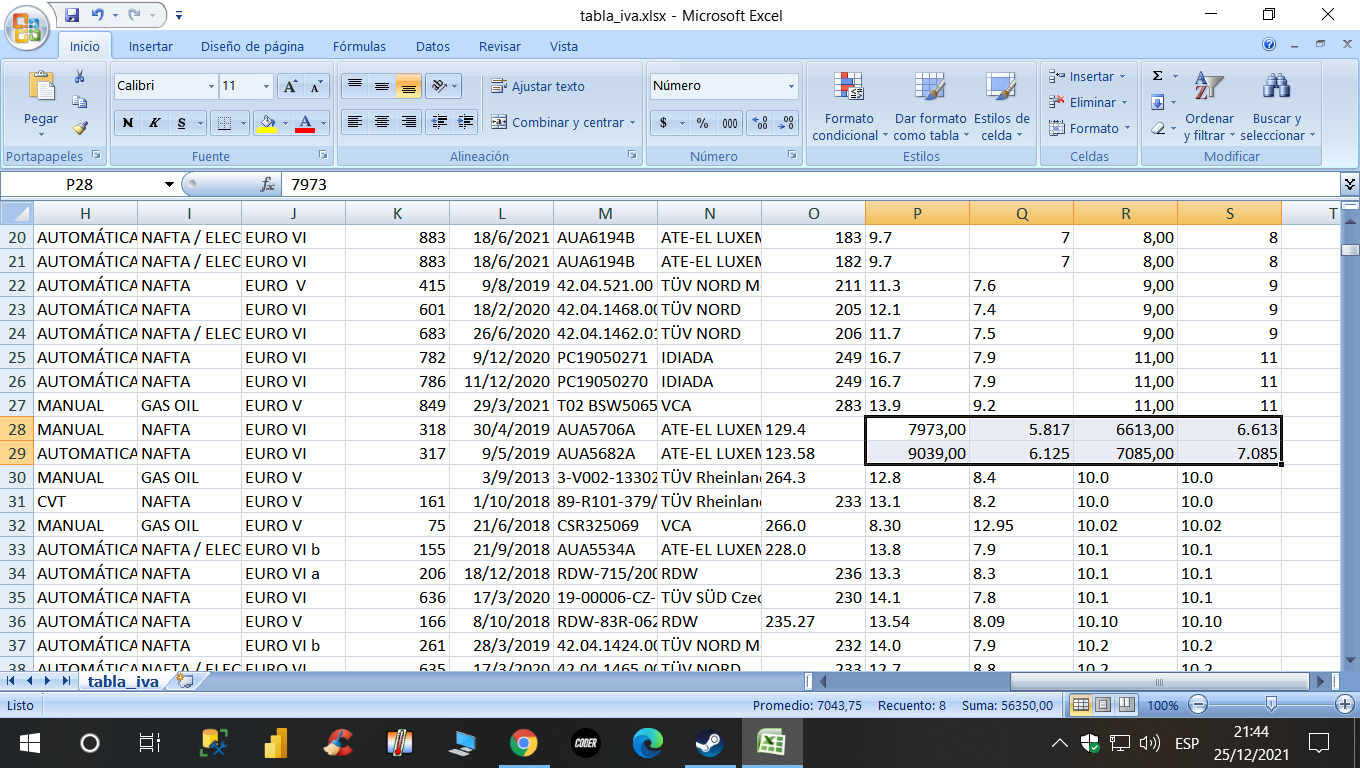

*Como veran en el Excel, en las columnas de Consumo Urbano, Consumo Extraurbano y Mixto, se encuentran los valores fuera de rango.*

*Son totalmente irrisorios; pero como son pocos, se pueden detectar y cambiar manualmente.*

Procedo a corregir solamente consumo_mixto, porque vamos a trabajar preferentemente sobre esta variable.

In [14]:
df_emisiones2.consumo_mixto = df_emisiones2.consumo_mixto.replace({6613.0:6.61, 7085.0:7.08})

In [15]:
df_emisiones2.describe().T

,count,mean,std,min,25%,50%,75%,max
vehiculo_cilindrada,606.0,2111.648515,871.700887,997.00,1515.50,1981.00,2359.000,6496.0
lca_numero,463.0,396.345572,266.958850,2.00,162.50,340.00,573.000,915.0
emision_CO2,607.0,183.538303,43.958914,13.40,153.60,176.10,206.000,382.0
consumo_urbano,605.0,38.144612,489.048316,2.39,8.30,9.60,11.300,9039.0
consumo_extraurbano,605.0,26.171587,342.770561,3.50,5.57,6.20,7.100,6125.0
consumo_mixto,607.0,7.748435,1.801549,2.30,6.60,7.47,8.535,15.5
id_etiqueta,607.0,30.292603,392.609745,2.30,6.60,7.50,8.600,7085.0


Como pueden ver arriba, el valor máximo de consumo_mixto bajo radicalmente, por lo que ahora ya podemos trabajar correctamente.

# **Primer Análisis:**

Verificamos nulos, tipos de datos (otra vez), valores repetidos de columnas:

In [16]:
df_emisiones2.isnull().sum()

vehiculo_marca                 0
vehiculo_modelo                0
vehiculo_tipo                  0
vehiculo_traccion              0
vehiculo_id_motor              0
vehiculo_cilindrada            1
vehiculo_potencia            290
vehiculo_tipo_transmision      1
vehiculo_tipo_combustible      1
vehiculo_standard_emision      3
lca_numero                   144
fecha_firma                   20
ensayo_gei_numero              0
ensayo_gei_laboratorio         0
emision_CO2                    0
consumo_urbano                 2
consumo_extraurbano            2
consumo_mixto                  0
id_etiqueta                    0
dtype: int64

Hay muchos datos nulos en "Vehiculo_potencia", por lo que prefiero enfocarme en otras variables,

(marca del vehiculo, cilindrada, consumo, emisiones, tracción)

In [17]:
df_emisiones2.dtypes

vehiculo_marca                       object
vehiculo_modelo                      object
vehiculo_tipo                        object
vehiculo_traccion                    object
vehiculo_id_motor                    object
vehiculo_cilindrada                 float64
vehiculo_potencia                    object
vehiculo_tipo_transmision            object
vehiculo_tipo_combustible            object
vehiculo_standard_emision            object
lca_numero                          float64
fecha_firma                  datetime64[ns]
ensayo_gei_numero                    object
ensayo_gei_laboratorio               object
emision_CO2                         float64
consumo_urbano                      float64
consumo_extraurbano                 float64
consumo_mixto                       float64
id_etiqueta                         float64
dtype: object

In [18]:
print(df_emisiones2.size)
print(df_emisiones2.shape)

11533
(607, 19)


In [19]:
df_emisiones2.vehiculo_marca.unique()

array(['TOYOTA', 'RENAULT', 'CITROËN', 'LEXUS', 'KIA', 'PEUGEOT', 'FORD',
       'PEUGEOT / CITROËN', 'HYUNDAI', 'CHERY', 'SUZUKI', 'CHEVROLET',
       'LIFAN', 'BMW', 'CITROËN / DS', 'HONDA', 'NISSAN', 'FIAT',
       'VOLKSWAGEN', 'ALFA ROMEO', 'FAW', 'MERCEDES-BENZ', 'JEEP',
       'LAND ROVER', 'JAC', 'VOLVO', 'SHINERAY', 'CHANGAN', 'DS', 'MINI',
       'DOMY', 'BORGWARD', 'PORSCHE', 'AUDI', 'BAIC', 'ZANELLA', 'RAM',
       'FOTON', 'MASERATI', 'SUBARU', 'HAVAL', 'ISUZU', 'DONGFENG',
       'MERCEDES-AMG', 'MITSUBISHI', 'ZOTYE', 'GREAT WALL', 'KYC',
       'FERRARI', 'McLAREN'], dtype=object)

In [20]:
df_emisiones2.vehiculo_marca.duplicated().sum()

557

In [21]:
df_emisiones2.vehiculo_marca.mode()

0    CHEVROLET
dtype: object

In [ ]:
df_emisiones2.vehiculo_modelo.unique()

In [23]:
df_emisiones2.vehiculo_modelo.duplicated().sum()

210

In [24]:
df_emisiones2.vehiculo_modelo.mode()

0    RANGER
dtype: object

Podemos utilizar boxplots para visualizar diferentes variables:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



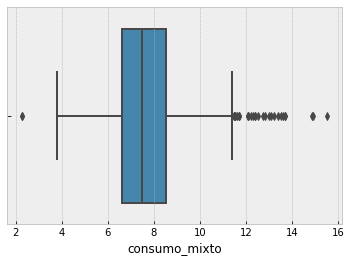

In [25]:
sns.boxplot(df_emisiones2.consumo_mixto, data=df_emisiones2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



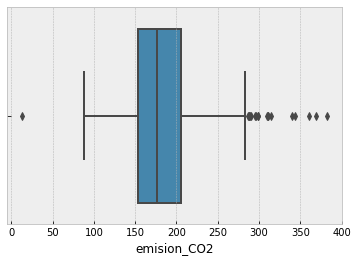

In [26]:
sns.boxplot(df_emisiones2.emision_CO2, data=df_emisiones2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



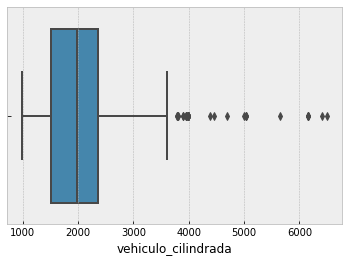

In [27]:
sns.boxplot(df_emisiones2.vehiculo_cilindrada, data=df_emisiones2)

!

# **Histogramas Iniciales:**

Podemos utilizar Histogramas para visualizar Consumo y Emisiones!

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



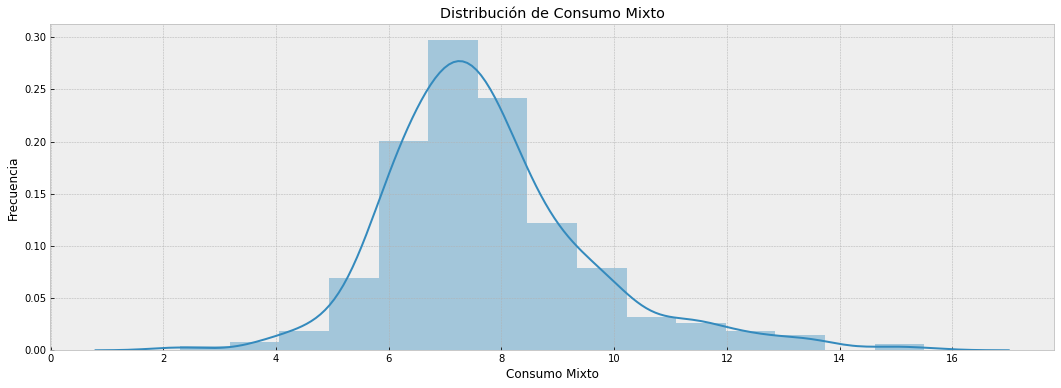

In [84]:
plt.figure(figsize=(18,6))

sns.distplot(df_emisiones2.consumo_mixto, kde=True, hist=True, bins=15)
plt.xlabel('Consumo Mixto')
plt.ylabel('Frecuencia')
plt.title('Distribución de Consumo Mixto')

plt.show()

Con Plotly:

Text(0, 0.5, 'Frecuencia absoluta')

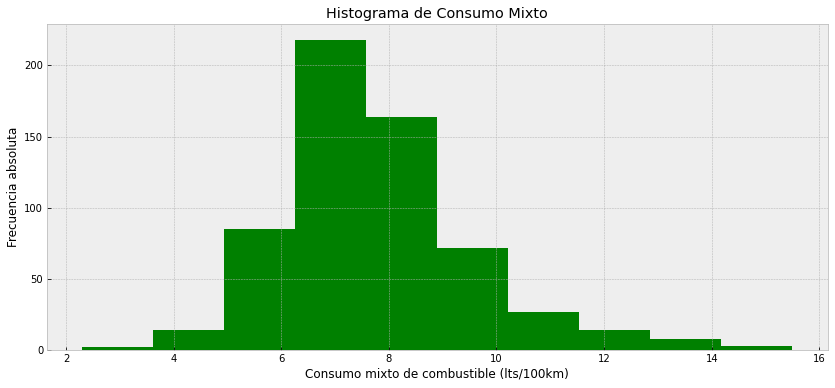

In [85]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.hist(df_emisiones2.consumo_mixto, bins=10, color='green')

ax.set_title('Histograma de Consumo Mixto')
ax.set_xlabel('Consumo mixto de combustible (lts/100km)')
ax.set_ylabel('Frecuencia absoluta')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



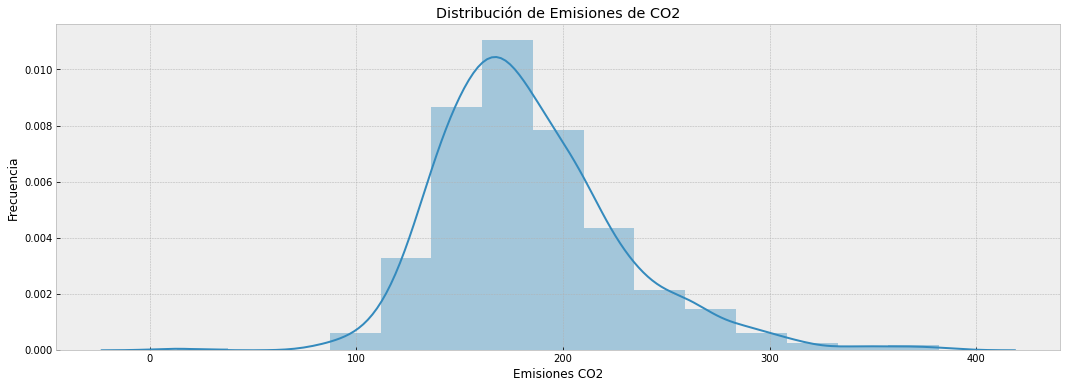

In [86]:
plt.figure(figsize=(18,6))

sns.distplot(df_emisiones2.emision_CO2, kde=True, hist=True, bins=15)
plt.xlabel('Emisiones CO2')
plt.ylabel('Frecuencia')
plt.title('Distribución de Emisiones de CO2')

plt.show()

Text(0, 0.5, 'Frecuencia absoluta')

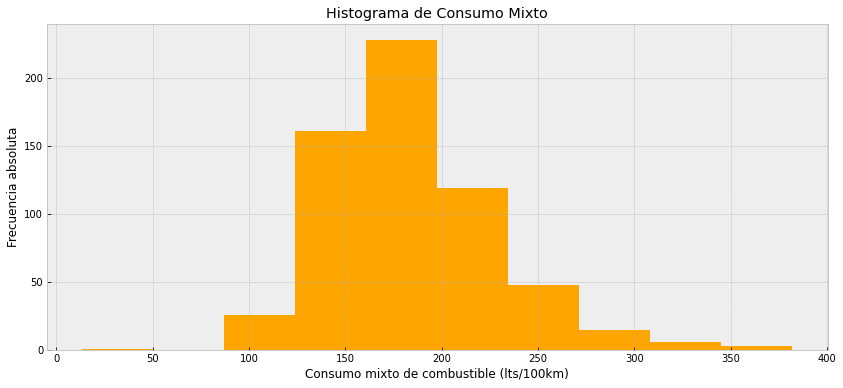

In [87]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.hist(df_emisiones2.emision_CO2, bins=10, color='orange')

ax.set_title('Histograma de Consumo Mixto')
ax.set_xlabel('Consumo mixto de combustible (lts/100km)')
ax.set_ylabel('Frecuencia absoluta')

# Agrupamiento:


Empezamos a agrupar nuestros valores para poder graficar:

Agrupamos primero por Marcas:

In [88]:
df_marcas = df_emisiones2.groupby(['vehiculo_marca'])['vehiculo_modelo'].count().reset_index(name='conteo').sort_values(by='conteo', ascending=False)
df_marcas.head(7)

,vehiculo_marca,conteo
7,CHEVROLET,51
32,MERCEDES-BENZ,50
1,AUDI,37
16,FORD,37
41,RENAULT,34
21,HYUNDAI,32
46,VOLKSWAGEN,29


Text(0.5, 0, 'Marca')

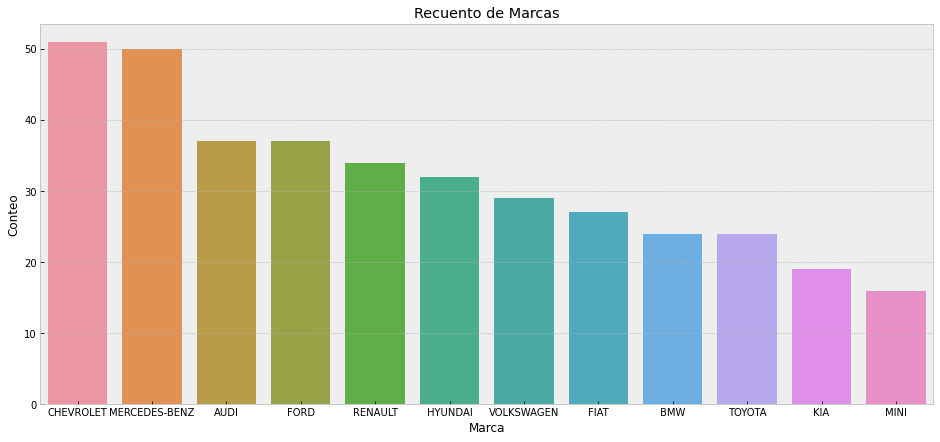

In [89]:
fig, ax = plt.subplots(figsize=(16,7))
sns.barplot(x='vehiculo_marca', y='conteo', data=df_marcas.head(12))

ax.set_title('Recuento de Marcas')
ax.set_ylabel('Conteo')
ax.set_xlabel('Marca')

Con Plotly:

In [97]:
fig = px.bar(df_marcas.head(12), x='vehiculo_marca', y='conteo',
            template='presentation',
            labels={'conteo':'Cantidad', 'vehiculo_marca':'Marca'},
            title='Distribución de Marcas',
            height=420,
            width=840
)
fig.show()

**Empezamo a relacionar dos variables:**

Podemos agrupar por **consumo**:

In [98]:
# df_consumo* = df_emisiones2.groupby(['vehiculo_marca'])['consumo_mixto'].mean()    -------->   (solo arrojará un promedio en forma de lista)

In [99]:
df_marca_consumo = df_emisiones2[["vehiculo_marca", "consumo_mixto"]].groupby(['vehiculo_marca'], as_index=False).mean().sort_values(by='consumo_mixto', ascending=False)

Como se visualiza en la línea de arriba, uso "mean", y no "count".

Esto es, porque estoy tratando de de hacer un promedio del consumo de cada marca por separado.

In [100]:
df_marca_consumo.head(7)

,vehiculo_marca,consumo_mixto
30,MASERATI,13.155000
14,FERRARI,12.633333
31,MERCEDES-AMG,11.540000
35,McLAREN,11.202000
39,PORSCHE,10.633333
40,RAM,9.950000
24,JEEP,9.365625


Text(0.5, 0, 'Marca')

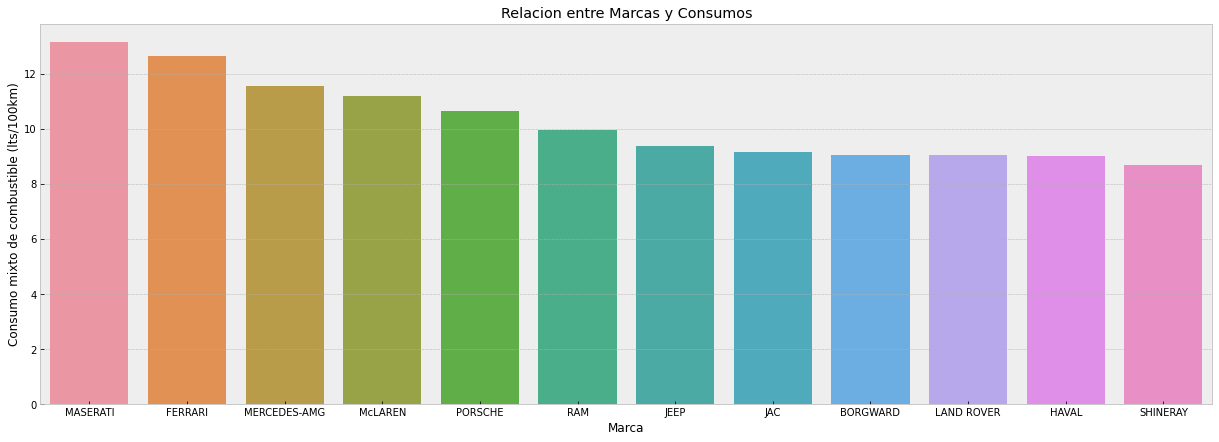

In [101]:
fig, ax = plt.subplots(figsize=(21,7))
sns.barplot(x='vehiculo_marca', y='consumo_mixto', data=df_marca_consumo.head(12))

ax.set_title('Relacion entre Marcas y Consumos')
ax.set_ylabel('Consumo mixto de combustible (lts/100km)')
ax.set_xlabel('Marca')

*Los vehiculos con mayor nivel de emision promedio, son: Maserati, Ferrari, Mercedes, McLaren, y Porsche, entre otros.*

Tambien podemos agrupar por **cantidad de emisiones** promedio de cada marca:

In [102]:
df_marca_emisiones = df_emisiones2[["vehiculo_marca", "emision_CO2"]].groupby(['vehiculo_marca'], as_index=False).mean().sort_values(by='emision_CO2', ascending=False)

In [103]:
df_marca_emisiones.head(7)

,vehiculo_marca,emision_CO2
30,MASERATI,301.657500
35,McLAREN,298.800000
14,FERRARI,288.666667
31,MERCEDES-AMG,256.600000
40,RAM,247.350000
39,PORSCHE,239.400000
23,JAC,230.800000


Text(0.5, 0, 'Marca')

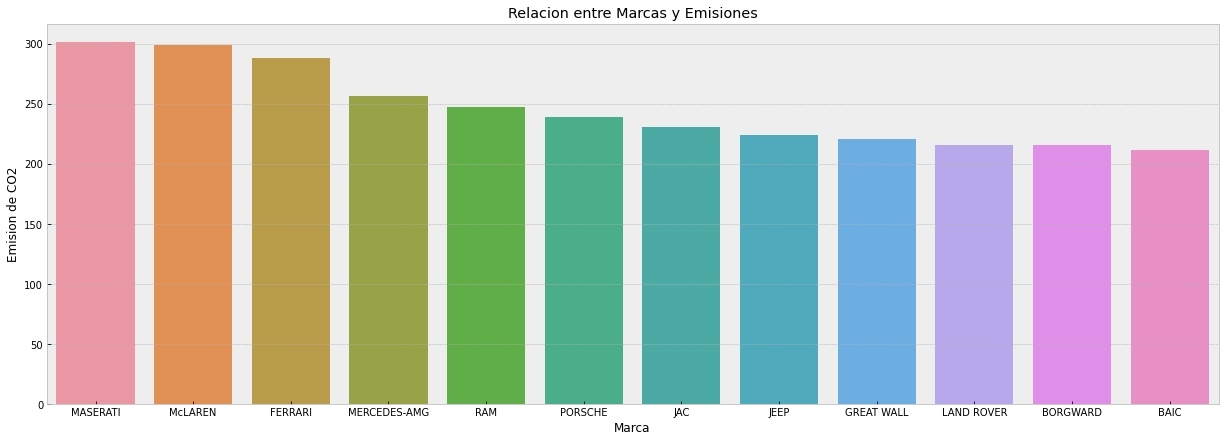

In [104]:
fig, ax = plt.subplots(figsize=(21,7))
sns.barplot(x='vehiculo_marca', y='emision_CO2', data=df_marca_emisiones.head(12))

ax.set_title('Relacion entre Marcas y Emisiones')
ax.set_ylabel('Emision de CO2')
ax.set_xlabel('Marca')

*Los vehiculos con mayor nivel de emision promedio, son: Maserati, McLaren, Ferrari, Mercedes,  y Ram, entre otros.*

Agrupamos por el volumen de la cilindrada promedio de cada marca:

In [38]:
df_marca_cc = df_emisiones2[["vehiculo_marca", "vehiculo_cilindrada"]].groupby(['vehiculo_marca'], as_index=False).mean().sort_values(by='vehiculo_cilindrada', ascending=False)

In [39]:
df_marca_cc.head(7)

,vehiculo_marca,vehiculo_cilindrada
14,FERRARI,4766.666667
31,MERCEDES-AMG,3982.000000
35,McLAREN,3916.000000
30,MASERATI,3816.500000
40,RAM,3512.666667
39,PORSCHE,3319.333333
22,ISUZU,2999.000000


Text(0.5, 0, 'Marca')

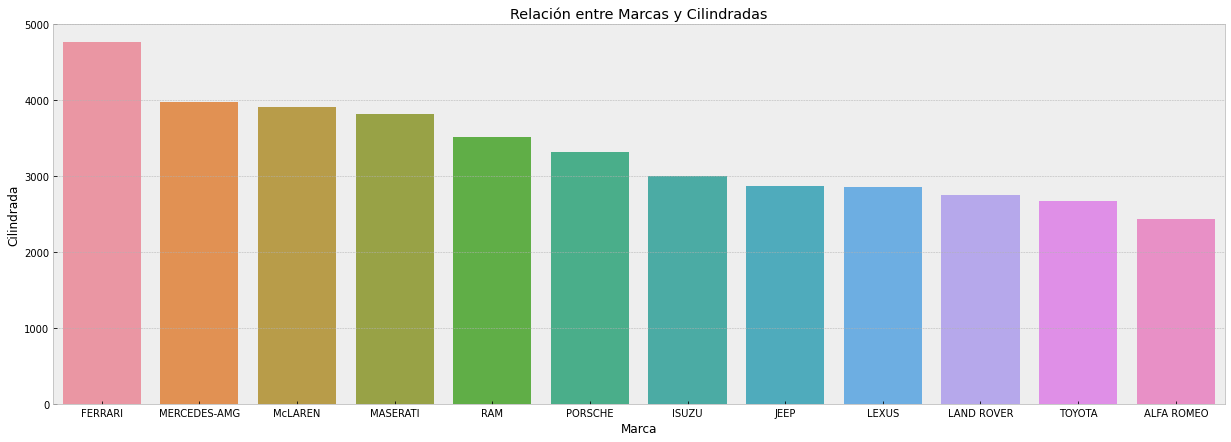

In [105]:
fig, ax = plt.subplots(figsize=(21,7))
sns.barplot(x='vehiculo_marca', y='vehiculo_cilindrada', data=df_marca_cc.head(12))

ax.set_title('Relación entre Marcas y Cilindradas')
ax.set_ylabel('Cilindrada')
ax.set_xlabel('Marca')

*Los vehiculos con mayor cilindrada promedio, son: Ferrari, Mercedes, McLaren, Maserati y Ram, entre otros.*

# **Relaciones entre variables**

 *Ahora nos mandamos de lleno!* 🔥

*Que relación esperan entre consumo y emisiones?* ❓

*O entre cilindrada y emisiones??* 😵

# Relación entre consumo y emisiones:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



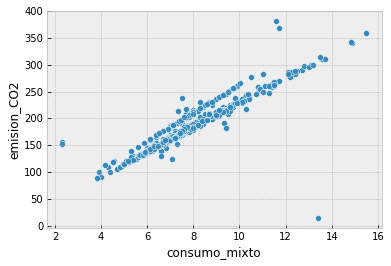

In [106]:
sns.scatterplot(df_emisiones2['consumo_mixto'], df_emisiones2['emision_CO2'])

*Esta linea de codigo es bastante sencilla en comparación con las demás;*

*pero aun así nos permite ver una **relación** muuuy clara entre consumo y emisiones!*

Podemos ir agregandole muchas cosas!

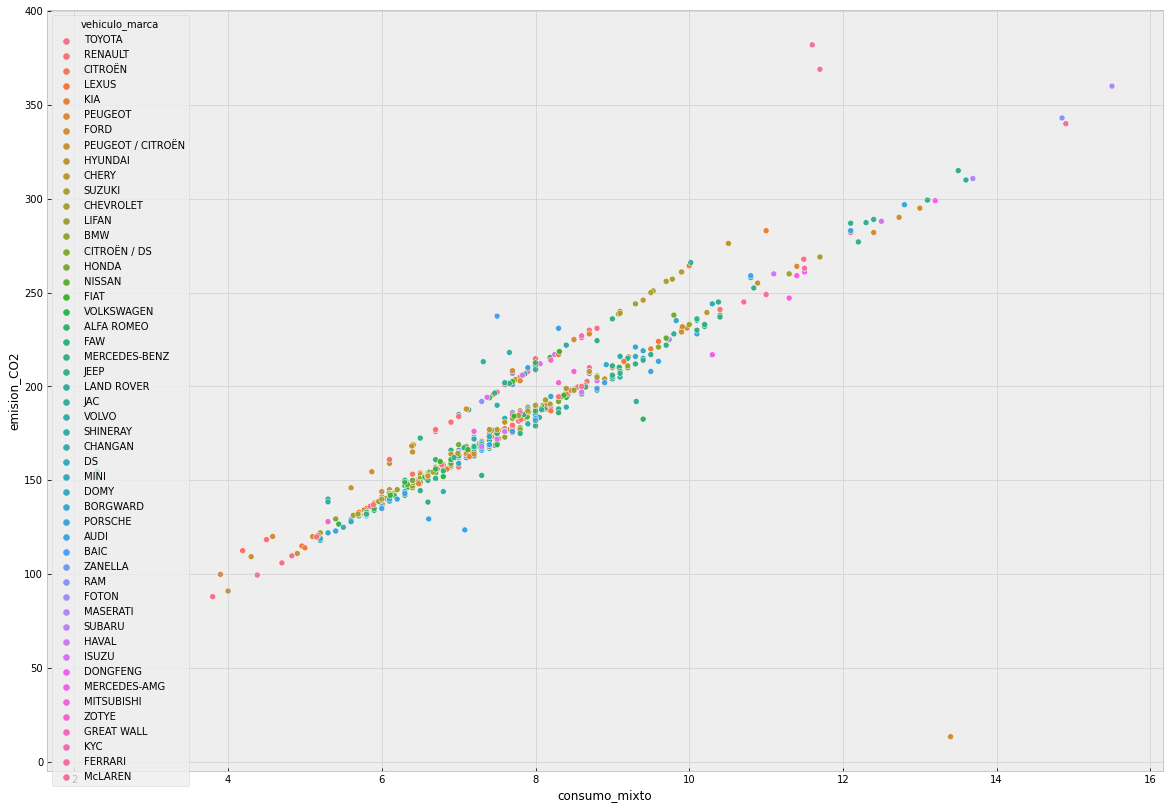

In [107]:
plt.figure(figsize=(20,14))
sns.scatterplot(x='consumo_mixto',y='emision_CO2',data=df_emisiones2, hue='vehiculo_marca')
plt.show()

Para mejor análisis, filtramos solo aquellas observaciones con altos valores de emisiones:

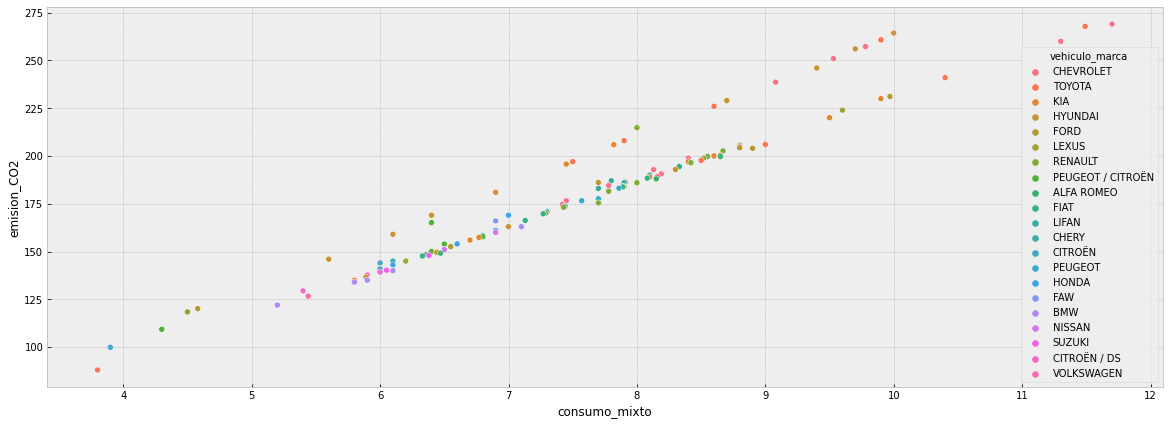

In [108]:
plt.figure(figsize=(20,7))
sns.scatterplot(x='consumo_mixto',y='emision_CO2',data=df_emisiones2.head(130).sort_values(by='emision_CO2', ascending=False), hue='vehiculo_marca')

plt.show()

# Relacion entre Cilindrada y Emisiones:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



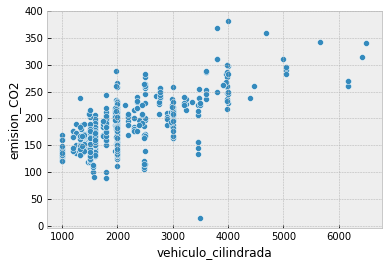

In [109]:
sns.scatterplot(df_emisiones2['vehiculo_cilindrada'], df_emisiones2['emision_CO2'])

*Aquí, la relación es sustancialmente menos clara, pero, al menos, se mantiene una relación positiva entre ambas variables.*

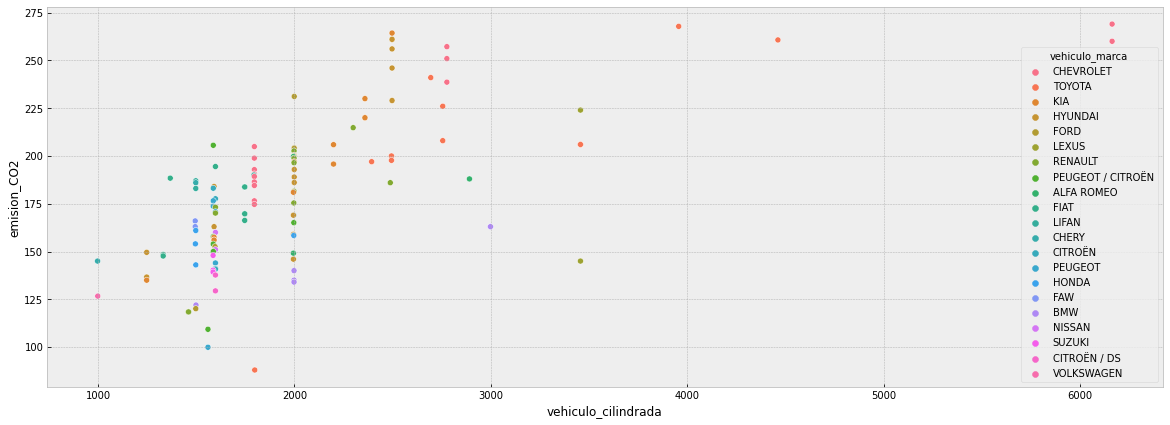

In [111]:
plt.figure(figsize=(20,7))
sns.scatterplot(x='vehiculo_cilindrada',y='emision_CO2',data=df_emisiones2.head(130).sort_values(by='emision_CO2', ascending=False), hue='vehiculo_marca')

plt.show()

# ¿Relacion entre Cilindrada y Consumo?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



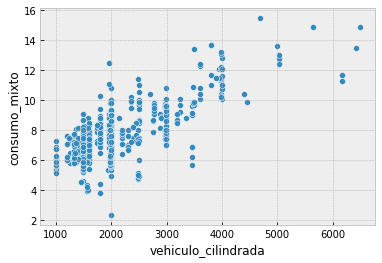

In [112]:
sns.scatterplot(df_emisiones2['vehiculo_cilindrada'], df_emisiones2['consumo_mixto'])

*Esta relación es bastante similar a la anterior.* 

*Mayores cilindradas suelen tener mayores emisiones en general.*

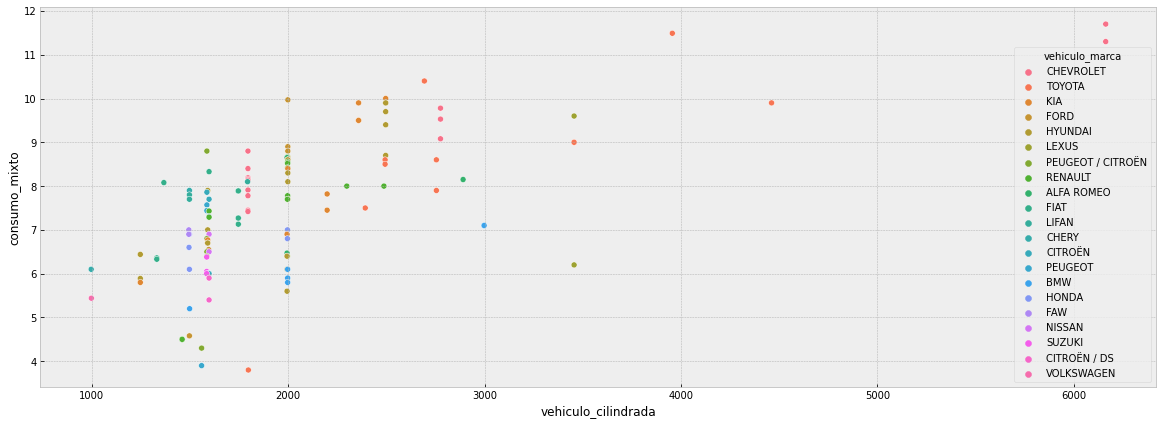

In [114]:
plt.figure(figsize=(20,7))
sns.scatterplot(x='vehiculo_cilindrada',y='consumo_mixto',data=df_emisiones2.head(130).sort_values(by='consumo_mixto', ascending=False), hue='vehiculo_marca')

plt.show()

!

# **Recordemos que tambien podemos trabajar sin Seaborn!**

Text(0, 0.5, 'Emisiones de CO2')

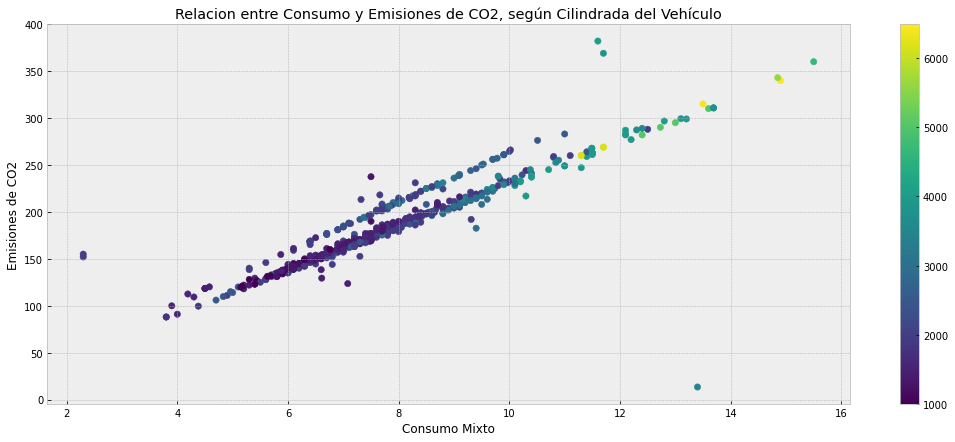

In [115]:
fig, ax = plt.subplots(figsize=(18, 7))

mapeo_colores = ax.scatter(df_emisiones2['consumo_mixto'], df_emisiones2['emision_CO2'], c=df_emisiones2.vehiculo_cilindrada, s=40)
fig.colorbar(mapeo_colores)

ax.set_title('Relacion entre Consumo y Emisiones de CO2, según Cilindrada del Vehículo')
ax.set_xlabel('Consumo Mixto')
ax.set_ylabel('Emisiones de CO2')

***Sinceramente, este gráfico es el que más me gusta.***

*Aqui podemos verificar claramente, que:*

*- Hay una correlación positiva entre consumo y emision de CO2.*

*- Los autos con bajas cilindradas, generalmente tienen también bajas emisiones y bajo consumo.*


🚗🚘🚗🚘🚗🚘🚗🚘🚗🚘🚗🚘🚗🚘🚗🚘🚗🚘🚗🚐🚗🚐🚗🚐🚗🚐🚗🚐🚗🚐🚗🚐🚗

**!**

*Este Colab tiene la intencion de servir como introduccion al análisis de datos con python, seaborn y matplotlib.*

*Los invito a plantearse más análisis sobre el mismo Dataset (o sobre uno de mayor volumen, por qué no?) para descubrir más y más relaciones entre los datos.*

*Se puede implementar un Modelo de Ciencia de Datos con Regresión Lineal?*

*Por supuesto.*

🚗🚐🚗🚐🚗🚐🚗🚐🚗🚐🚗🚐🚗🚐🚗🚘🚗🚘🚗🚘🚗🚘🚗🚘🚗🚘🚗🚘🚗🚘🚗🚘

# ***Muchas gracias!***